In [7]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = Path('raw')
test = raw_data / 'test.csv'
train = raw_data / 'train.csv'

In [8]:
# load files

df_test = pd.read_csv(test)
df_train = pd.read_csv(train)

In [9]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
print(df_train.head())
print(df_train.shape)
print(df_train.describe())
print(df_train.dtypes)
print(df_train.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(8

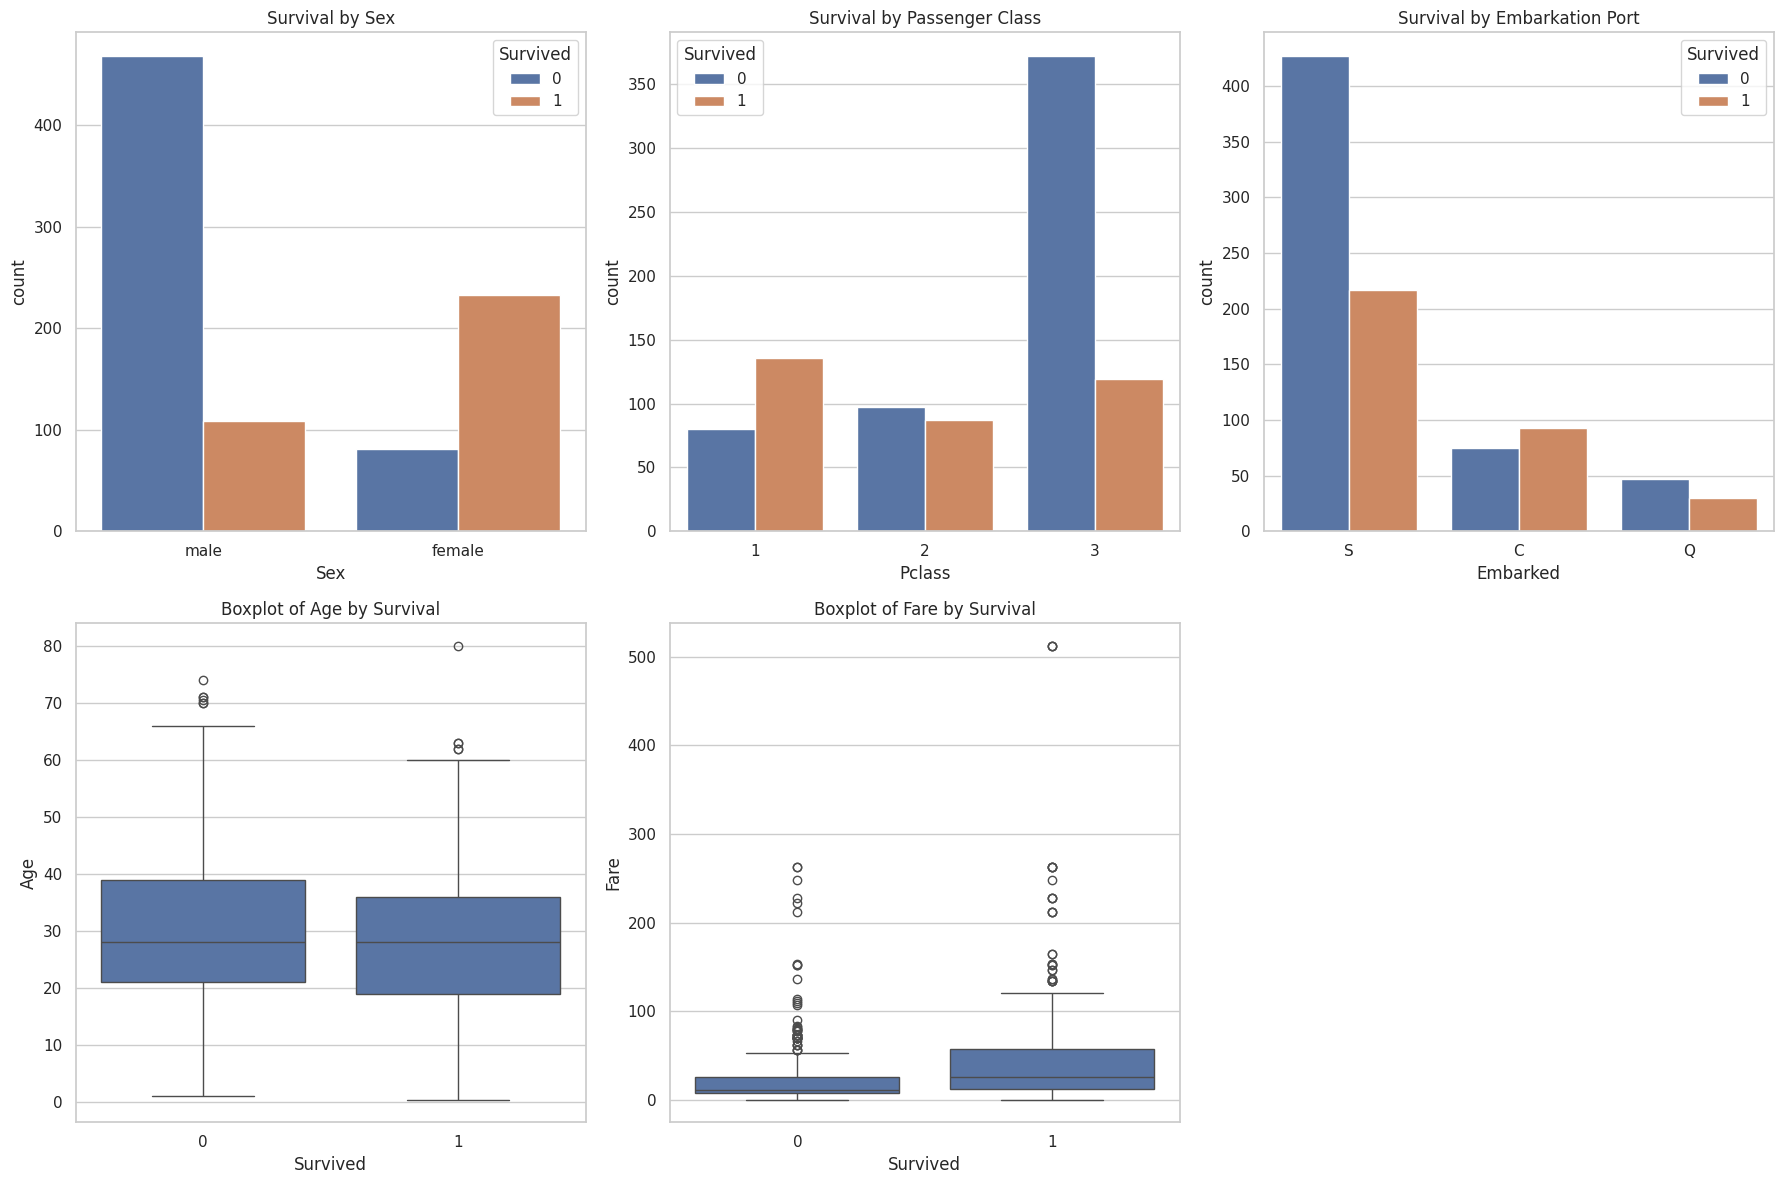

In [13]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Diagrammes à barres pour le sexe, la classe du passager, et le port d'embarquement
sns.countplot(x="Sex", hue="Survived", data=df_train, ax=axes[0, 0])
axes[0, 0].set_title('Survival by Sex')

sns.countplot(x="Pclass", hue="Survived", data=df_train, ax=axes[0, 1])
axes[0, 1].set_title('Survival by Passenger Class')

sns.countplot(x="Embarked", hue="Survived", data=df_train, ax=axes[0, 2])
axes[0, 2].set_title('Survival by Embarkation Port')

# Boîtes à moustaches pour l'âge et le tarif
sns.boxplot(x="Survived", y="Age", data=df_train, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Age by Survival')

sns.boxplot(x="Survived", y="Fare", data=df_train, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Fare by Survival')

# Effacement du dernier graphique inutilisé
axes[1, 2].set_visible(False)

# Affichage des graphiques
plt.tight_layout()
plt.show()

Survival by Sex: Il y a une distinction claire entre le nombre de survivants selon le sexe. Les femmes ont un taux de survie nettement plus élevé que les hommes, ce qui pourrait être dû à la politique de sauvetage « les femmes et les enfants d'abord ».

Survival by Passenger Class: Le taux de survie semble décroître avec la diminution du statut de la classe. Les passagers de première classe ont le taux de survie le plus élevé, suivis par ceux de la deuxième et troisième classe. Ceci suggère que les passagers avec des billets de classe supérieure avaient plus de chances de survivre, peut-être parce qu'ils avaient un meilleur accès aux canots de sauvetage ou étaient situés plus près des ponts d'évacuation.

Survival by Embarkation Port: Les passagers ayant embarqué à Cherbourg ont un taux de survie plus élevé par rapport à ceux qui ont embarqué à Southampton ou Queenstown. Cela pourrait être lié à d'autres facteurs, comme la classe de billet, qui n'est pas directement visible ici.

Boxplot of Age by Survival: On remarque que les passagers plus jeunes ont tendance à avoir un taux de survie plus élevé. Les boîtes à moustaches montrent que les survivants avaient un âge médian légèrement inférieur à celui des non-survivants, mais avec quelques points aberrants, représentant des enfants et des personnes âgées ayant survécu.

Boxplot of Fare by Survival: Les passagers ayant survécu ont payé des tarifs généralement plus élevés, ce qui est cohérent avec le taux de survie plus élevé observé pour les passagers de première classe. Il y a également un nombre considérable de points aberrants parmi les survivants, ce qui indique que quelques passagers ayant payé des tarifs très élevés ont survécu.

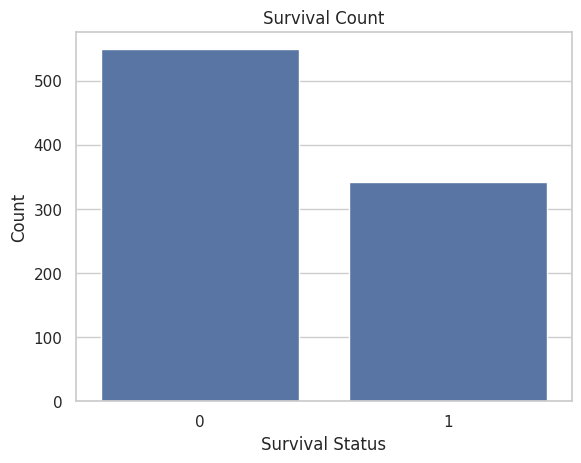

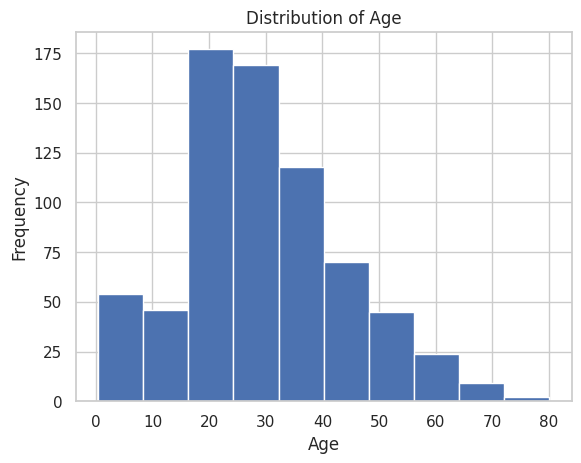

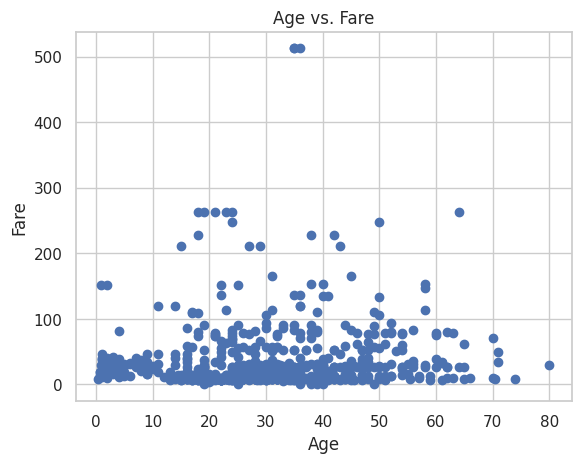

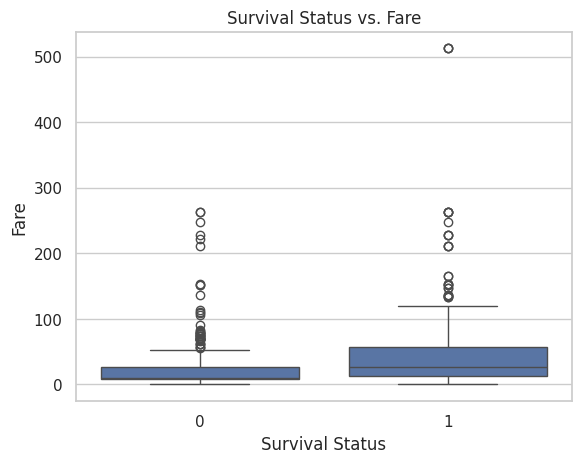

In [14]:
# Bar plot
sns.countplot(x='Survived', data=df_train)
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Survival Count')
plt.show()

# Histogram
plt.hist(df_train['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# Scatter plot
plt.scatter(df_train['Age'], df_train['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare')
plt.show()

# Box plot
sns.boxplot(x=df_train['Survived'], y=df_train['Fare'])
plt.xlabel('Survival Status')
plt.ylabel('Fare')
plt.title('Survival Status vs. Fare')
plt.show()

In [15]:
women = df_train.loc[df_train.Sex == 'female']["Survived"]
men = df_train.loc[df_train.Sex == 'male']["Survived"]
rate_women = sum(women)/len(women)
rate_men = sum(men)/len(men)

print("% of women who survived:", rate_women)
print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


In [16]:
def apply_feature_engineering(df):
    """
    Applique les étapes de nettoyage et d'ingénierie des fonctionnalités à un DataFrame donné.
    
    Args:
        df (pd.DataFrame): Le DataFrame à nettoyer et transformer.
        
    Returns:
        pd.DataFrame: Le DataFrame nettoyé et transformé.
    """
    df_cleaned = df.copy()

    # Extraction des titres
    df_cleaned['Title'] = df_cleaned['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

    # Imputation des âges manquants en utilisant l'âge médian par 'Pclass', 'Sex', et 'Title'
    df_cleaned['Age'] = df_cleaned.groupby(['Pclass', 'Sex', 'Title'])['Age'].transform(lambda x: x.fillna(x.median()))

    # Pour la colonne 'Cabin', nous allons créer une nouvelle variable catégorielle
    # qui indique si l'information sur la cabine était manquante ou non
    df_cleaned['Cabin_known'] = df_cleaned['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

    # Pour la colonne 'Embarked', nous allons remplacer les valeurs manquantes par le port le plus commun
    most_common_embarked = df_cleaned['Embarked'].mode()[0]
    df_cleaned['Embarked'] = df_cleaned['Embarked'].fillna(most_common_embarked)

    # Gestion des outliers pour 'Fare'
    # Nous allons plafonner les tarifs au 99ème percentile pour réduire l'impact des outliers extrêmes
    fare_99th_percentile = df_cleaned['Fare'].quantile(0.99)
    df_cleaned['Fare'] = df_cleaned['Fare'].apply(lambda x: min(x, fare_99th_percentile))
    # Compute the 'FamilySize' first
    df_cleaned['FamilySize'] = df_cleaned['SibSp'] + df_cleaned['Parch'] + 1

    # Then, create 'IsAlone' without chained assignment
    df_cleaned['IsAlone'] = 1  # initialize the column with all ones (yes/alone)
    df_cleaned.loc[df_cleaned['FamilySize'] > 1, 'IsAlone'] = 0  # update to no/0 if family size is greater than 1

    # The rest of the feature engineering steps seem fine
    df_cleaned['AgeCategory'] = pd.cut(df_cleaned['Age'], bins=[0,12,20,40,60,80], labels=[1,2,3,4,5])
    df_cleaned['FareCategory'] = pd.qcut(df_cleaned['Fare'], 4, labels=[1,2,3,4])

    # Handle 'Deck' similarly, without chained assignment
    df_cleaned['Deck'] = df_cleaned['Cabin'].str[0].fillna("M")  # assign 'M' for Missing
    return df_cleaned

In [17]:
df_cleaned = apply_feature_engineering(df_train)
df_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Cabin_known,FamilySize,IsAlone,AgeCategory,FareCategory,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,2,0,3,1,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,2,0,3,4,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1,1,3,2,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,2,0,3,4,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,1,1,3,2,M


In [18]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Name          891 non-null    object  
 4   Sex           891 non-null    object  
 5   Age           891 non-null    float64 
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Cabin         204 non-null    object  
 11  Embarked      891 non-null    object  
 12  Title         891 non-null    object  
 13  Cabin_known   891 non-null    int64   
 14  FamilySize    891 non-null    int64   
 15  IsAlone       891 non-null    int64   
 16  AgeCategory   891 non-null    category
 17  FareCategory  891 non-null    category
 18  Deck      

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Sélection des features, en excluant les colonnes non numériques et non pertinentes
X = df_cleaned.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
# Encodage des colonnes catégorielles si nécessaire
X = pd.get_dummies(X, drop_first=True)
# Cible
y = df_cleaned['Survived']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
predictions = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, predictions))

# Validation croisée
cross_val_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-Validated Scores: {cross_val_scores}')


Accuracy: 0.8324022346368715
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       105
           1       0.78      0.84      0.81        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.83      0.83       179

Cross-Validated Scores: [0.80446927 0.78089888 0.84831461 0.76966292 0.83146067]


### Observations :

1.  **Précision et Recall** :
    
    *   **Classe 0 (Non-survivants)** : Une précision de 88% indique une bonne capacité du modèle à identifier correctement les non-survivants. Le recall de 83% montre que le modèle capture bien la majorité des vrais non-survivants.
    *   **Classe 1 (Survivants)** : Une précision de 78% et un recall de 84% montrent que le modèle est légèrement moins précis mais plus sensible pour la classe des survivants.
2.  **F1-Score** :
    
    *   Les scores F1 pour les deux classes sont assez équilibrés, ce qui est un bon indicateur que le modèle gère bien les deux classes, malgré le déséquilibre potentiel dans les données.
3.  **Scores de validation croisée** :
    
    *   Les scores varient de 76.97% à 84.83%, ce qui pourrait indiquer une certaine variabilité dans la performance du modèle selon les différentes partitions des données. Cela suggère que le modèle pourrait bénéficier d'une optimisation supplémentaire pour améliorer la stabilité de ses performances.

In [20]:
from sklearn.model_selection import GridSearchCV

# Paramètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Création du modèle pour le Grid Search
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres et du meilleur score
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleur score : ", grid_search.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=10, n_estimator

/home/alric/anaconda3/envs/kaggle_titanic/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
108 fits failed out of a total of 324.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/home/alric/anaconda3/envs/kaggle_titanic/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/alric/anaconda3/envs/kaggle_titanic/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/alric/anaconda3/envs/kaggle_titanic/lib/python3.10/site-packages/sklearn/base.py", lin

Meilleurs paramètres :  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 300}
Meilleur score :  0.8328782989989244


In [21]:
from sklearn.metrics import accuracy_score, classification_report

best_rf = grid_search.best_estimator_
predictions = best_rf.predict(X_test)
print("Accuracy on test set:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


Accuracy on test set: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f'{name} Test Accuracy: {score}')

Logistic Regression Test Accuracy: 0.8268156424581006
Support Vector Machine Test Accuracy: 0.664804469273743
Gradient Boosting Test Accuracy: 0.8212290502793296


In [23]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', best_rf),
    ('gbc', GradientBoostingClassifier())
], voting='hard')

voting_clf.fit(X_train, y_train)
voting_score = voting_clf.score(X_test, y_test)
print("Voting Classifier Test Accuracy:", voting_score)

Voting Classifier Test Accuracy: 0.8324022346368715


In [24]:
# 4. Analyse de l'importance des caractéristiques
feature_importances = best_rf.feature_importances_
features = X_train.columns
importance_dict = dict(zip(features, feature_importances))
sorted_importance = sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)
for feature, importance in sorted_importance[:10]:  # Top 10 features
    print(f'{feature}: {importance}')

Sex_male: 0.15796257952848858
Title_Mr: 0.15240367065309401
Fare: 0.12032098973410489
Age: 0.08696999778683782
Pclass: 0.06481459964793439
Title_Mrs: 0.05930100468080321
FamilySize: 0.04972430101394308
Title_Miss: 0.035806115087309735
SibSp: 0.03377911208947218
Cabin_known: 0.03198430438633471


In [25]:
df_test_cleaned = apply_feature_engineering(df_test)
df_test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   418 non-null    int64   
 1   Pclass        418 non-null    int64   
 2   Name          418 non-null    object  
 3   Sex           418 non-null    object  
 4   Age           417 non-null    float64 
 5   SibSp         418 non-null    int64   
 6   Parch         418 non-null    int64   
 7   Ticket        418 non-null    object  
 8   Fare          417 non-null    float64 
 9   Cabin         91 non-null     object  
 10  Embarked      418 non-null    object  
 11  Title         418 non-null    object  
 12  Cabin_known   418 non-null    int64   
 13  FamilySize    418 non-null    int64   
 14  IsAlone       418 non-null    int64   
 15  AgeCategory   417 non-null    category
 16  FareCategory  417 non-null    category
 17  Deck          418 non-null    object  
dtypes: categor

/home/alric/anaconda3/envs/kaggle_titanic/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


# TEST DE KAGGLE

In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Charger les données d'entraînement et de test
df_train = pd.read_csv(train)
df_test = pd.read_csv(test)

# Appliquer le feature engineering
df_train_cleaned = apply_feature_engineering(df_train)
df_test_cleaned = apply_feature_engineering(df_test)

# Préparation des données d'entraînement
X_train = df_train_cleaned.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X_train = pd.get_dummies(X_train, drop_first=True)
y_train = df_train_cleaned['Survived']

# Entraînement du modèle
model = RandomForestClassifier(n_estimators=300, max_depth=10, max_features='sqrt', min_samples_split=5, random_state=42)
model.fit(X_train, y_train)

# Préparation des données de test
X_test = df_test_cleaned.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
X_test = pd.get_dummies(X_test, drop_first=True)

# Alignement des colonnes de test avec celles d'entraînement
missing_cols = set(X_train.columns) - set(X_test.columns)
for c in missing_cols:
    X_test[c] = 0
X_test = X_test[X_train.columns]

# Prédiction sur le jeu de test
predictions = model.predict(X_test)

# Création du fichier de soumission
submission = pd.DataFrame({
    'PassengerId': df_test_cleaned['PassengerId'],
    'Survived': predictions
})
submission.to_csv('submission.csv', index=False)

print("Le fichier de soumission a été créé avec succès !")


/home/alric/anaconda3/envs/kaggle_titanic/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


ValueError: Shape of passed values is (891, 42), indices imply (891, 14)